   ## Importing header files

In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Loading the Data & Checking for null values

In [15]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Encoding categorical data

In [16]:
df['symboling'] = -df['symboling']
df.drop(['car_ID','CarName'],axis=1,inplace=True)

df['enginetype'] = df['enginetype'].map({'l':'0','rotor':'1','dohcf':'2','ohcv':'3', 'ohcf':'4', 'ohc': '5', 'dohc':'6','dohcv':'7'}).astype('int64')
df['fuelsystem'] = df['fuelsystem'].map({'idi':'0','spfi':'1','1bbl':'2','mfi':'3','2bbl':'4', '4bbl':'5', 'spdi': '6', 'mpfi':'7'}).astype('int64')
df['fueltype'] = df['fueltype'].map({'gas':'0','diesel':'1'}).astype('int64')
df['aspiration'] = df['aspiration'].map({'std':'0','turbo':'1'}).astype('int64')
df['doornumber'] = df['doornumber'].map({'two':'2','four':'4'}).astype('int64')
df['carbody'] = df['carbody'].map({'convertible':'0','hatchback':'1','sedan':'2','wagon':'3','hardtop':'4'}).astype('int64')
df['drivewheel'] = df['drivewheel'].map({'rwd':'0','fwd':'1','4wd':'2'}).astype('int64')
df['enginelocation'] = df['enginelocation'].map({'front':'0','rear':'1'}).astype('int64')
df['cylindernumber'] = df['cylindernumber'].map({'four':'4','six':'6','five':'5','three':'3','twelve':'12','two':'2','eight':'8'}).astype('int64')

# Visualizing the data with Correlation Matrix

<AxesSubplot:>

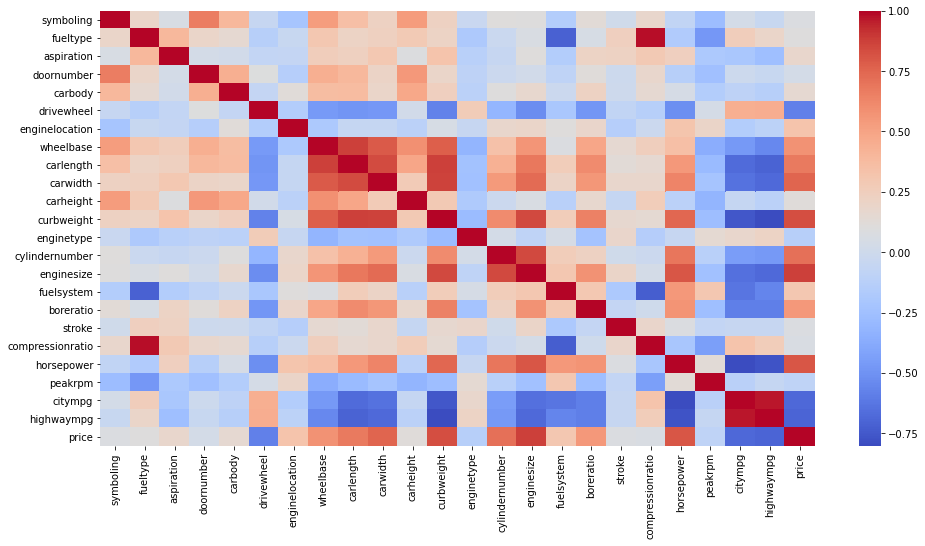

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=False,cmap='coolwarm')

# Splitting and scaling the data

In [18]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [21]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and testing Linear Regression Model

In [22]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test,y_pred)
print("Root Mean Squared Error:", rmse)
print("R^2: ", r2)

Root Mean Squared Error: 2304.9515341391875
R^2:  0.9095823947092144


# Printing predicted price of test input

In [23]:
results = [(actual, predicted) for actual, predicted in zip(y_test, y_pred)]
for actual, predicted in results:
    print("Actual:", actual, "Predicted:", predicted)

Actual: 24565.0 Predicted: 17555.211639875633
Actual: 8189.0 Predicted: 10158.021845386838
Actual: 7603.0 Predicted: 6632.087194663069
Actual: 7609.0 Predicted: 6574.194531390847
Actual: 6377.0 Predicted: 6535.777665279159
Actual: 8948.0 Predicted: 9811.763745418186
Actual: 10945.0 Predicted: 7643.248224798014
Actual: 22625.0 Predicted: 18973.310347318886
Actual: 7995.0 Predicted: 9504.92082670021
Actual: 16500.0 Predicted: 16925.843524353837
Actual: 16845.0 Predicted: 19285.430479005045
Actual: 5572.0 Predicted: 6420.7981098419
Actual: 18399.0 Predicted: 21695.31804204297
Actual: 11048.0 Predicted: 12092.961844229612
Actual: 7975.0 Predicted: 9804.789336658596
Actual: 30760.0 Predicted: 25929.170872173636
Actual: 8495.0 Predicted: 11018.950018005915
Actual: 11259.0 Predicted: 9034.328415275824
Actual: 7099.0 Predicted: 8493.80932901845
Actual: 7299.0 Predicted: 5796.402734554977
Actual: 6229.0 Predicted: 6564.996655801186
Actual: 8921.0 Predicted: 11315.678458705715
Actual: 9895.0 Pre